In [69]:
#Feature: Read data from an external file, such as text, JSON, CSV, etc and use that data in your application
#Feature: Create and call at least 3 functions or methods, at least one of which must return a value that is used somewhere else in your code.
#Feature: Use pandas, matplotlib, and/or numpy to perform a data analysis project. Ingest 2 or more pieces of data, analyze that data in some manner, and display a new result to a graph, chart, or other display
#Feature: Create a dictionary or list, populate it with several values, retrieve at least one value, and use it in your program
#Feature: Visualize data in a graph, chart, or other visual representation of data

In [70]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
matplotlib inline

In [72]:
#Read from country_definitions.csv
df_countries = pd.read_csv('data/country_definitions.csv')
df_countries.rename(columns={'region': 'Country'}, inplace=True) # Rename Country column to NOC


df_countries.head() #TEST

NOC      Country                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [73]:
#Read csv files
def import_data(file_name, season):
    df = pd.read_csv(file_name)
    df["Season"] = season #Adding a column for the season of the Olympic games
    df["Sport"] = df["Discipline"].astype(str) + "-" + df["Event"].astype(str) # Add a column discribes the event
    df.rename(columns={'Country': 'NOC'}, inplace=True) # Rename Country column to NOC
    #df = df[['Year','NOC', 'Sport', 'Medal', 'Season']] # Select only useful columns

    return df


df1 = import_data("data/summer.csv", "summer")
df2 = import_data("data/winter.csv", "winter")

df1.head(2000) #TEST

Year    City                                      Sport Discipline  NOC  \
0     1896  Athens                    Swimming-100M Freestyle   Swimming  AUT   
1     1896  Athens                    Swimming-400M Freestyle   Swimming  AUT   
2     1896  Athens        Swimming-100M Freestyle For Sailors   Swimming  GRE   
3     1896  Athens        Swimming-100M Freestyle For Sailors   Swimming  GRE   
4     1896  Athens        Swimming-100M Freestyle For Sailors   Swimming  GRE   
...    ...     ...                                        ...        ...  ...   
1995  1924   Paris       Shooting-600M Free Rifle, Individual   Shooting  DEN   
1996  1924   Paris  Shooting-25M Rapid Fire Pistol (60 Shots)   Shooting  FIN   
1997  1924   Paris                Shooting-Trap (125 Targets)   Shooting  FIN   
1998  1924   Paris        Shooting-50M Rifle Prone (60 Shots)   Shooting  FRA   
1999  1924   Paris   Shooting-100M Running Deer, Double Shots   Shooting  GBR   

     Gender                             Event   Medal  \
0       Men                    100M Freestyle  Silver   
1       Men                    400M Freestyle    Gold   
2       Men        100M Freestyle For Sailors  Bronze   
3       Men        100M Freestyle For Sailors    Gold   
4       Men        100M Freestyle For Sailors  Silver   
...     ...                               ...     ...   
1995    Men       600M Free Rifle, Individual  Bronze   
1996    Men  25M Rapid Fire Pistol (60 Shots)  Bronze   
1997    Men                Trap (125 Targets)  Silver   
1998    Men        50M Rifle Prone (60 Shots)    Gold   
1999    Men   100M Running Deer, Double Shots  Silver   

                              Athlete  Season  
0                    HERSCHMANN, Otto  summer  
1                       NEUMANN, Paul  summer  
2                   DRIVAS, Dimitrios  summer  
3                  MALOKINIS, Ioannis  summer  
4                  CHASAPIS, Spiridon  summer  
...                               ...     ...  
1995      LARSEN, Niels Hansen Ditlev  summer  
1996       HANNELIUS, Lennart Wilhelm  summer  
1997           HUBER, Konrad Walentin  summer  
1998        COQUELIN DE LISLE, Pierre  summer  
1999  MACKWORTH-PRAED, Cyril Winthrop  summer  

[2000 rows x 10 columns]

In [74]:
#Sort Function  to prepare for joining dataframes

def sort_funct(df, col):
    df_sorted = df.sort_values(col)
    
    return df_sorted

df1_sorted = sort_funct (df1, 'NOC')
df2_sorted = sort_funct (df2, 'NOC')
df_countries_sorted = sort_funct (df_countries, 'NOC')


#Combine the two dataframes using outer join
df1 = pd.merge(df1_sorted, df_countries, on='NOC', how='outer')
df2 = pd.merge(df2_sorted, df_countries, on='NOC', how='outer')
df3 = pd.concat([df1, df2])

df3.head(2200) #TEST

Year     City                           Sport    Discipline  NOC  \
0     2012.0   London            Taekwondo-58 - 68 KG     Taekwondo  AFG   
1     2008.0  Beijing               Taekwondo-- 58 KG     Taekwondo  AFG   
2     1988.0    Seoul     Sailing-Board (Division Ii)       Sailing  AHO   
3     1996.0  Atlanta  Boxing-57 - 60KG (Lightweight)        Boxing  ALG   
4     2000.0   Sydney                 Athletics-5000M     Athletics  ALG   
...      ...      ...                             ...           ...  ...   
2195  1996.0  Atlanta            Table Tennis-Doubles  Table Tennis  CHN   
2196  1996.0  Atlanta            Table Tennis-Doubles  Table Tennis  CHN   
2197  1996.0  Atlanta            Table Tennis-Singles  Table Tennis  CHN   
2198  1996.0  Atlanta            Table Tennis-Singles  Table Tennis  CHN   
2199  1996.0  Atlanta            Table Tennis-Singles  Table Tennis  CHN   

     Gender                    Event   Medal           Athlete  Season  \
0       Men               58 - 68 KG  Bronze  NIKPAI, Rohullah  summer   
1       Men                  - 58 KG  Bronze  NIKPAI, Rohullah  summer   
2       Men      Board (Division Ii)  Silver   BOERSMA, Jan D.  summer   
3       Men  57 - 60KG (Lightweight)    Gold   SOLTANI, Hocine  summer   
4       Men                    5000M  Silver   SAIDI-SIEF, Ali  summer   
...     ...                      ...     ...               ...     ...   
2195    Men                  Doubles  Silver               CHN  summer   
2196    Men                  Doubles    Gold               CHN  summer   
2197  Women                  Singles    Gold      DENG, Yaping  summer   
2198  Women                  Singles  Bronze        QIAO, Hong  summer   
2199    Men                  Singles  Silver         WANG, Tao  summer   

          Country                 notes  
0     Afghanistan                   NaN  
1     Afghanistan                   NaN  
2         Curacao  Netherlands Antilles  
3         Algeria                   NaN  
4         Algeria                   NaN  
...           ...                   ...  
2195        China                   NaN  
2196        China                   NaN  
2197        China                   NaN  
2198        China                   NaN  
2199        China                   NaN  

[2200 rows x 12 columns]

In [112]:
#function to choose the season of Olympic games and the medal type

def Selection (season, medal):
    if season == 'summer' and medal == 'gold':
        result = df1.query('Medal == "Gold"')
    elif season == 'summer' and medal == 'silver':
        result = df1.query('Medal == "Silver"')
    elif season == 'summer' and medal == 'bronze':
        result = df1.query('Medal == "Bronze"')
    elif season == 'winter' and medal == 'gold':
        result = df2.query('Medal == "Gold"')
    elif season == 'winter' and medal == 'silver':
        result = df2.query('Medal == "Silver"')
    elif season == 'winter' and medal == 'bronze':
        result = df2.query('Medal == "Bronze"')
        
    elif season == 'summer' and medal == 'total_summer':
        result = df1
    elif season == 'winter' and medal == 'total_winter':
        result = df2
        
    elif season == 'both_seasons' and medal == 'gold':
        result = df3.query('Medal == "Gold"')
    elif season == 'both_seasons' and medal == 'silver':
        result = df3.query('Medal == "Silver"')
    elif season == 'both_seasons' and medal == 'bronze':
        result = df3.query('Medal == "Bronze"')
    elif season == 'both_seasons' and medal == 'grand_total':
        result = df3
        
    
    sorted = result['Country'].value_counts().rename_axis('Country').reset_index(name='Medals') #sorting and renaming columns of result dataframe
    
    
    return sorted

#TEST function with 'both seasons', 'total total'
top_total = Selection('both_seasons', 'grand_total').head(10)
top_total_G = Selection('both_seasons', 'gold').head(10)
top_summer = Selection('summer', 'total_summer').head(10)
top_summer_G = Selection('summer', 'gold').head(10)
top_winter = Selection('winter', 'total_winter').head(10)
top_winter_G = Selection('winter', 'gold').head(10)
top_winter #TEST

Country  Medals
0      Germany     401
1       Russia     381
2       Norway     368
3          USA     313
4      Austria     237
5       Canada     211
6      Finland     168
7       Sweden     158
8  Switzerland     152
9  Netherlands     130

<AxesSubplot:title={'center':'Top 10 Gold Winner Countries - Winter Games'}, xlabel='Countries', ylabel='Medals'>

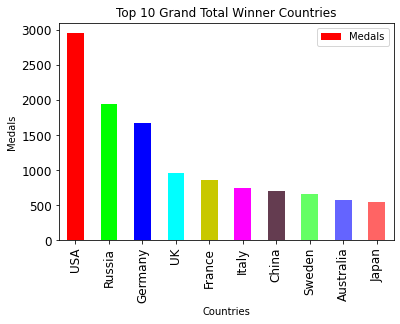

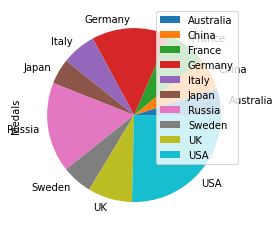

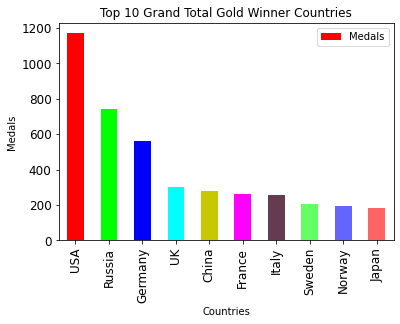

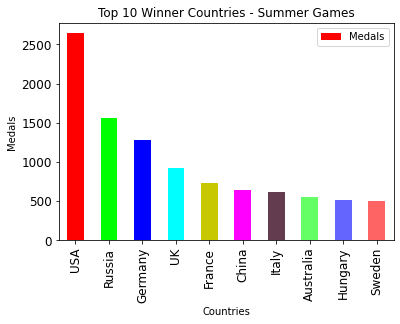

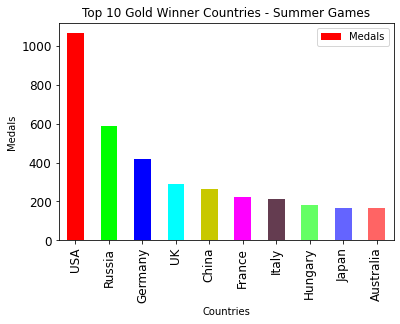

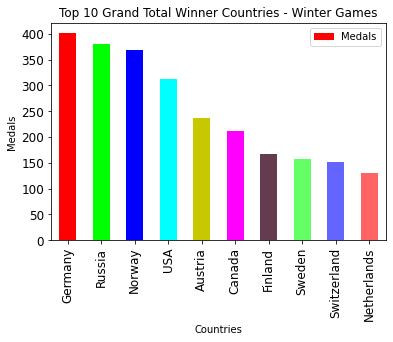

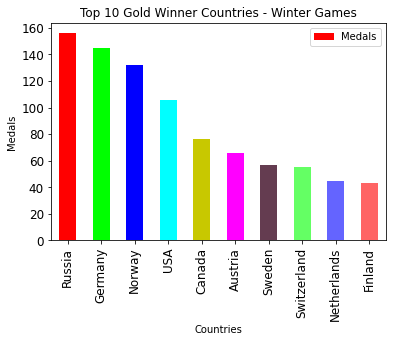

In [146]:
#Plotting
top_total.plot.bar(x='Country', y='Medals', title= 'Top 10 Grand Total Winner Countries', xlabel= 'Countries', ylabel= 'Medals', fontsize='large',
                  color=[(255/255, 0/255, 0/255), (0/255, 255/255, 0/255), (0/255, 0/255, 255/255), (0/255, 255/255, 255/255),(200/255, 200/255, 0/255),
                         (255/255, 0/255, 255/255),(100/255, 60/255, 80/255),(100/255, 255/255, 100/255),(100/255, 100/255, 255/255),(255/255, 100/255, 100/255)])

top_total_G.plot.bar(x='Country', y='Medals', title= 'Top 10 Grand Total Gold Winner Countries', xlabel= 'Countries', ylabel= 'Medals', fontsize='large',
                  color=[(255/255, 0/255, 0/255), (0/255, 255/255, 0/255), (0/255, 0/255, 255/255), (0/255, 255/255, 255/255),(200/255, 200/255, 0/255),
                         (255/255, 0/255, 255/255),(100/255, 60/255, 80/255),(100/255, 255/255, 100/255),(100/255, 100/255, 255/255),(255/255, 100/255, 100/255)])

top_summer.plot.bar(x='Country', y='Medals', title= 'Top 10 Winner Countries - Summer Games', xlabel= 'Countries', ylabel= 'Medals', fontsize='large',
                  color=[(255/255, 0/255, 0/255), (0/255, 255/255, 0/255), (0/255, 0/255, 255/255), (0/255, 255/255, 255/255),(200/255, 200/255, 0/255),
                         (255/255, 0/255, 255/255),(100/255, 60/255, 80/255),(100/255, 255/255, 100/255),(100/255, 100/255, 255/255),(255/255, 100/255, 100/255)])

top_summer_G.plot.bar(x='Country', y='Medals', title= 'Top 10 Gold Winner Countries - Summer Games', xlabel= 'Countries', ylabel= 'Medals', fontsize='large',
                  color=[(255/255, 0/255, 0/255), (0/255, 255/255, 0/255), (0/255, 0/255, 255/255), (0/255, 255/255, 255/255),(200/255, 200/255, 0/255),
                         (255/255, 0/255, 255/255),(100/255, 60/255, 80/255),(100/255, 255/255, 100/255),(100/255, 100/255, 255/255),(255/255, 100/255, 100/255)])

top_winter.plot.bar(x='Country', y='Medals', title= 'Top 10 Grand Total Winner Countries - Winter Games', xlabel= 'Countries', ylabel= 'Medals', fontsize='large',
                  color=[(255/255, 0/255, 0/255), (0/255, 255/255, 0/255), (0/255, 0/255, 255/255), (0/255, 255/255, 255/255),(200/255, 200/255, 0/255),
                         (255/255, 0/255, 255/255),(100/255, 60/255, 80/255),(100/255, 255/255, 100/255),(100/255, 100/255, 255/255),(255/255, 100/255, 100/255)])

top_winter_G.plot.bar(x='Country', y='Medals', title= 'Top 10 Gold Winner Countries - Winter Games', xlabel= 'Countries', ylabel= 'Medals', fontsize='large',
                  color=[(255/255, 0/255, 0/255), (0/255, 255/255, 0/255), (0/255, 0/255, 255/255), (0/255, 255/255, 255/255),(200/255, 200/255, 0/255),
                         (255/255, 0/255, 255/255),(100/255, 60/255, 80/255),(100/255, 255/255, 100/255),(100/255, 100/255, 255/255),(255/255, 100/255, 100/255)])

<AxesSubplot:title={'center':'Top 10 All-Time Winners'}, ylabel='Medals'>

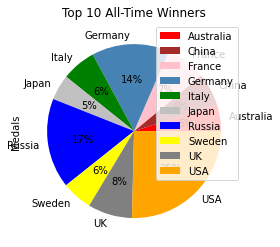

In [156]:
top_total.groupby(['Country']).sum().plot(kind='pie', y='Medals', autopct='%1.0f%%',
                                colors = ['red', 'brown', 'pink', 'steelblue', 'green', 'silver', 'blue', 'yellow', 'gray', 'orange'],
                                title='Top 10 All-Time Winners')